# Imports

In [1]:
# EDA libs
import numpy as np
import pandas as pd


In [26]:
# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
# model,pred,eval libs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_curve,roc_auc_score

# Gathering Data 

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Droping "Time","Amount" features.

df.drop(labels=['Time','Amount'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
V1       284807 non-null float64
V2       284807 non-null float64
V3       284807 non-null float64
V4       284807 non-null float64
V5       284807 non-null float64
V6       284807 non-null float64
V7       284807 non-null float64
V8       284807 non-null float64
V9       284807 non-null float64
V10      284807 non-null float64
V11      284807 non-null float64
V12      284807 non-null float64
V13      284807 non-null float64
V14      284807 non-null float64
V15      284807 non-null float64
V16      284807 non-null float64
V17      284807 non-null float64
V18      284807 non-null float64
V19      284807 non-null float64
V20      284807 non-null float64
V21      284807 non-null float64
V22      284807 non-null float64
V23      284807 non-null float64
V24      284807 non-null float64
V25      284807 non-null float64
V26      284807 non-null float64
V27      284807 non-null float6

In [14]:
df.drop(labels='Class',axis=1).describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [18]:
Class = df['Class'].value_counts()
print(f'No of positive(fraud) cases are {Class[1]}')
print(f'No of negative(Nonfraud) cases are {Class[0]}')

No of positive(fraud) cases are 492
No of negative(Nonfraud) cases are 284315


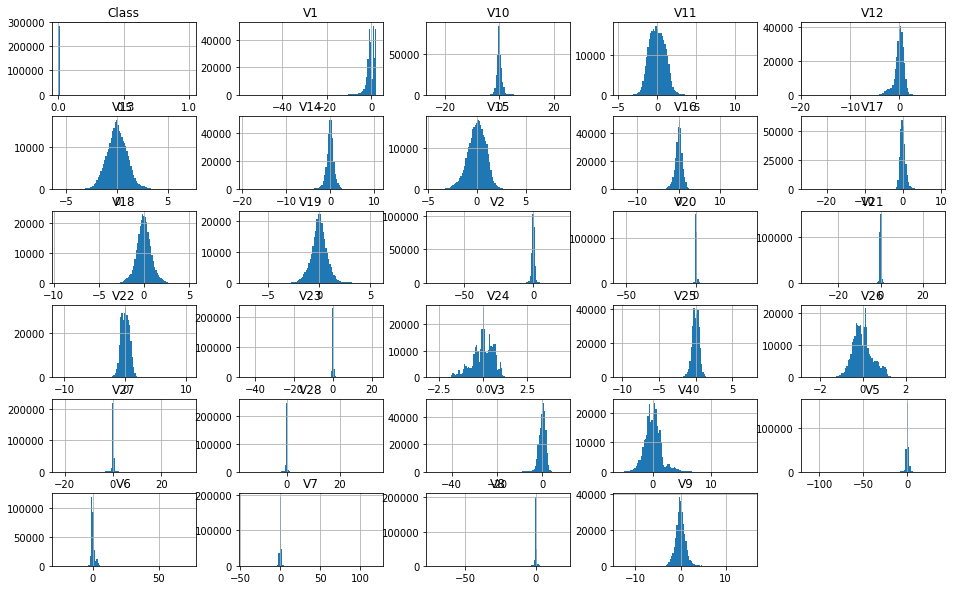

In [22]:

df.hist(figsize=(16,10),bins=100,)
plt.show()

In [31]:
corr = df.corr()



(29, 29)

In [38]:
mask = np.zeros_like(corr)
triu = np.triu_indices_from(mask)
mask[triu] = True

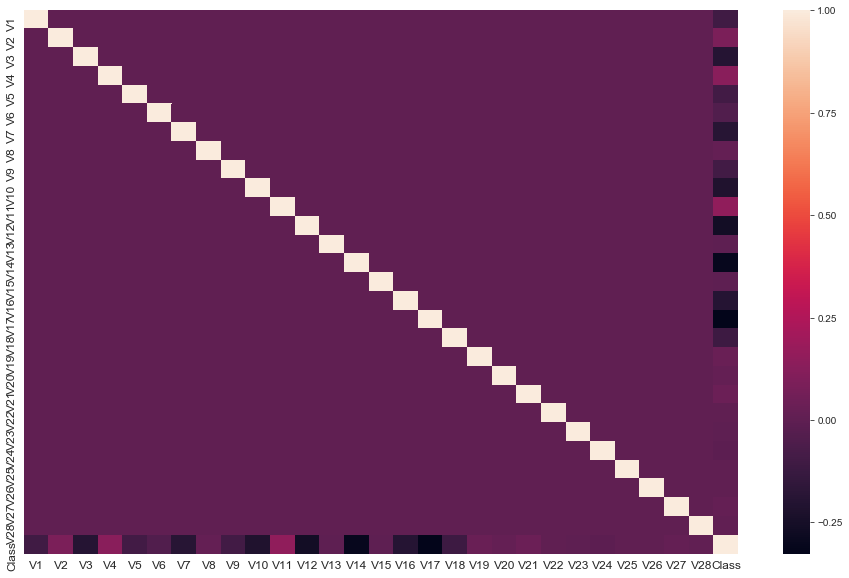

In [47]:
plt.figure(figsize=(16,10))
sns.heatmap(corr)
sns.set_style('white')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Data split

In [49]:
X = df.drop(labels='Class',axis=1)
y = df['Class']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base Model

In [53]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred_lgt = log_model.predict(X_test)

In [58]:
confusion_matrix(y_test,y_pred_lgt,labels=[0,1])

array([[93825,    13],
       [   56,    93]], dtype=int64)

In [59]:
precision_score(y_test,y_pred_lgt)

0.8773584905660378

In [60]:
recall_score(y_test,y_pred_lgt)

0.6241610738255033

In [62]:
f1_score()

0.7294117647058823

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_lgt,pos_label=0)

In [67]:
precision, recall, thresholds

(array([0.99841467, 0.12264151, 1.        ]),
 array([1.00000000e+00, 1.38536627e-04, 0.00000000e+00]),
 array([0, 1], dtype=int64))

In [68]:
precision

array([0.99841467, 0.12264151, 1.        ])

(0.0, 1.0)

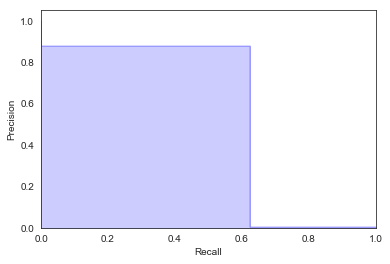

In [72]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test,y_pred_lgt)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
#plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          #average_precision))

In [73]:
print(f'precision = {precision}')

precision = [0.00158533 0.87735849 1.        ]
